In [1]:
import os
import pymp
import time
import math
import pymp
import numpy as np
import pyfftw as ft
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
os.environ['TMPDIR']='/home/idies/workspace/scratch'

In [3]:
N = 1024

In [4]:
start = time.time()

wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_aws = ('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n','(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_codelet_n1fv_32_avx 0 #x10fdd #x10fdd #x0 #xd3a62617 #x8a0451dd #x42952706 #x6501219f)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf_16 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x9841df4f #xe400dd23 #xd6ec67a7 #x522d17d5)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2a9ad576 #x6117ee04 #x58022324 #x6ed5dcef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24 #xc8cff39e #xa823c75f #x926c5590)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xecb29e47 #x03b3cd61 #xa27bbdd7 #xf1a239db)\n  (fftwf_dft_indirect_register 0 #x10fdd #x10fdd #x0 #x4708cf10 #x9dd6031e #x074d1f25 #xae61f28f)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x660a6630 #xc4ce3c6a #x62a726bb #x4f6728ee)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xc8ec6694 #xe750e6f2 #x3889104c #xec903173)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 4 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x9382d45c #x3b4ef564 #x05a9af24 #x70bb1b32)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xb99abc38 #x8ead8d6b #xf0c5f1c4 #x54d4dbc2)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf91e412c #xc1e62b4b #xb772f42b #x91524b5a)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1b302212 #x94fbdfad #xf5eb1b1e #x9cbc4116)\n  (fftwf_codelet_r2cf_64 0 #x11bdd #x11bdd #x0 #xfd689742 #x8cf30941 #x28dc0368 #x1d560726)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #x732a80e5 #xfdc1c3ba #xa26d2e2b #xc829547e)\n  (fftwf_codelet_n1bv_32_avx 0 #x10bdd #x10bdd #x0 #x308753a3 #xcc3d5e80 #xf64312e3 #xc698c209)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_r2hc_register 0 #x10fdd #x10fdd #x0 #xf198bf27 #xb1c4fdb7 #xc76c5370 #xacd19ffe)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_t2fv_32_avx 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_codelet_r2cf_16 2 #x11bdd #x11bdd #x0 #x50d2f46f #x7308bf05 #x1e8d0b64 #x12981444)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xdbd34cc3 #x010b1fae #x10e8d12b #x05b15faf)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #x354d5c68 #x9e923e23 #xcdb19ec8 #xc1743254)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #x79d37ad9 #x16113414 #xc645ea14 #x3dd1bbb5)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf6b156b6 #x69706c05 #x3801e8c2 #xccec020e)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_r2cfII_16 2 #x11bdd #x11bdd #x0 #xf9dc5ef5 #xdbec3d0d #x0942416f #x9d652f91)\n  (fftwf_rdft_rank0_register 6 #x10fdd #x10fdd #x0 #x31fc48ea #x91190d4a #x7e381771 #xc41342ed)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x3c733b9d #xdcb5c493 #xea0b7ccc #x494a2eea)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xdeee3024 #xbaceb843 #xf78f49d6 #x68b91457)\n)\n','(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_pan = ('(fftw-3.2.1 fftw_wisdom\n)\n','(fftw-3.2.1 fftwf_wisdom\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x17333d08 #x8edd80ef #xd6077aac #xc600dd9c)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x73597971 #x3f692c94 #x4eb3b585 #x3564fb02)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf7dbc32c #x7bfe8fd1 #x6225e3ae #x5bfec555)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xd61ca6b8 #xcf472fa4 #x3e2ef447 #x247b9341)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x9de2bc1c #x7e18c7c7 #x0767b660 #xc8e91164)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #x32b1f8fc #x8d3c918b #xce98e177 #xa815f8d3)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #xb8f247fc #xb8fa53ba #x7d5cec88 #x6a2cc555)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xc436ee45 #x996b8534 #x450db1a9 #x3a33c51d)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf1402b7d #xa3a3a325 #x0d49574e #x0d09937f)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9bb194d6 #xb68b63ce #xa13a7c23 #xe3107465)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x183a577e #xd7e3c62c #x4bcc0f2a #x233232bf)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x9258f3a7 #x005cd840 #xac58c76d #x068f56a8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xa20aa25d #x429ae7fd #x950f8f28 #xaadfce5f)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbac9c1d4 #x0b224365 #x95e797f4 #xb6df2cc6)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x5cf94f7b #xceb68dab #x52a6ba80 #xe8720c22)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x1d424cc9 #x1470a7e8 #x2c308c92 #x2e5655f7)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x8769fcd3 #x4b8136bd #x6dd7e056 #x01df49de)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x4a598cec #xb55dae1c #xfcd414a6 #xee0420b9)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #xb382453b #xbc6c1fa5 #x744be879 #x23932d1c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x82b131d5 #xd5dc92f0 #x3d3ce22c #x960aebdf)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xb8edb03a #x684adcba #x9166094e #x719ce4cb)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xc38de049 #x749dcc3a #x59c86a86 #xfac577ce)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xefe16ed7 #xa13ffea6 #x4cb34c71 #x99e2609a)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xc3987657 #xb038fe87 #xe47bb398 #x2198f783)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x6b55daf1 #xeedaa247 #x4169b219 #x471c6cb8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x481d14e9 #xfc2b8a82 #x54aeff44 #xaf3c3eed)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x55be3aa3 #xcc62ed20 #x181f329a #xb93bf8ab)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xc54b9597 #xcedcb6cf #x66549ead #xac0cbf09)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x3dc2df28 #x0e40a456 #x1c449577 #x34701e37)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x11559ac4 #xea86db86 #xad6ae8e4 #x97f477c6)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x444aa1ed #xbfa70e99 #x7fc3ef42 #x870daef5)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x5d8865dd #xf5555f1d #x98ed7615 #xb74f4ba5)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x3aee36ad #xf81507d9 #xaeec5eec #x4a1ae49f)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x0a076fcf #x7ab5a641 #xf8554cba #x6189532c)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x67697a12 #xefa46667 #x8b4f578f #x0ce1cd5d)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #x41be5f3a #x8e188182 #x0eb7a0fa #x9ec11807)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #x38de26f9 #x44ca4c7c #x1087bc01 #x2a7d4eb1)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x6166df93 #x10ac3daa #x0d24c247 #x49d07678)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf3a43230 #xb7930d1b #xd3d7b6f1 #xd3c540ea)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xf5697fe5 #xd8d91ca2 #x330a4b69 #x4a1a71e7)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x57da8d92 #x4132851a #xcf3ba48c #xb978683f)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xd4112e8d #x84e09c74 #x042cb226 #xd0c4cb02)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x97d22b6b #xae1cc81d #x1852d0be #xff1c9eaa)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x97e393c8 #xca274e2c #x858e4556 #x684616d9)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x652b0af3 #x5b84278b #x24619407 #x33abea69)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x3e80cd72 #xb96f0593 #x41719ae1 #x04050744)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xa0828aee #x0e817d95 #x0c3ed3ee #xba4c0ed0)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #xddf2f2fa #xc8d385c9 #x6320c8bd #x2f3e1787)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x50162e2a #x8694ce40 #x3193fd9e #xfc0e6f61)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x03b795ae #x7dcb604a #xcc56a0cc #xadda128f)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xac5b56ae #x077b1817 #xa6535664 #xb320dcff)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x17299a08 #x9580f3e7 #x6460b204 #x17a3e5ab)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xd64a0b5d #x7770c64e #x091f6772 #x2554debc)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf7502f16 #x7db69831 #xa46fa854 #x4433245b)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xacbf3294 #xd2efadfd #xbe85b16c #xd160c59b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x40a9cca4 #x0fdc336f #xc77c488a #x84c2c4cd)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x65c5d09a #x5f73b2db #x2236728c #x8776c413)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x12bb431c #x62137a1e #x6dd1cb0f #x842691e8)\n)\n','(fftw-3.2.1 fftwl_wisdom\n)\n')
ft.import_wisdom(wiz)
Q = np.zeros((N,N,N),dtype='float32')
R = np.zeros((N,N,N),dtype='float32')
S2 = np.zeros((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

5.8783390522


In [5]:
start = time.time()

nproc = 8
nx = N//nproc

lQ = np.zeros((N//nproc,N,N), dtype='float32')
lR = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-Q-'+str(k)+'-(t=0.0).npz'
    files = folder+'/'+filename
    
    content = np.load(files)
    lQ = content['Q']
    
    Q[k*nx:(k+1)*nx,:,:] = lQ[:,:,:]
    
    filename = 'ref-R-'+str(k)+'-(t=0.0).npz'
    files = folder+'/'+filename
    
    content = np.load(files)
    lR = content['R']
    
    R[k*nx:(k+1)*nx,:,:] = lR[:,:,:]
    
end = time.time()
print(end-start)

38.9721391201


In [6]:
start = time.time()

nproc = 8
nx = N//nproc

lS2 = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

19.4810600281


In [7]:
del lQ,lR,lS2

In [8]:
avg = np.average(S2)
print(avg)

249.219


In [9]:
import pymp

In [10]:
start = time.time()

chi = np.zeros((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = np.zeros((N,N,N),dtype='float32')

end = time.time()
print(end-start)

2.32430315018


In [11]:
bmin = -15; bmax = 15; bins = 240
tl=np.linspace(bmin,bmax,bins,endpoint=True)

In [12]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [13]:
start = time.time()

for i in range(N):
    if i<N//2:
        X[i,:,:] = i*isotropic1024coarse['dx']
    else:
        X[i,:,:] = isotropic1024coarse['lx']-i*isotropic1024coarse['dx']
    
for j in range(N):
    if j<N//2:
        Y[:,j,:] = j*isotropic1024coarse['dx']
    else:
        Y[:,j,:] = isotropic1024coarse['lx']-j*isotropic1024coarse['dx']
    
for k in range(N):
    if k<N//2:
        Z[:,:,k] = k*isotropic1024coarse['dx']
    else:
        Z[:,:,k] = isotropic1024coarse['lx']-k*isotropic1024coarse['dx']

end = time.time()
print(end-start)

113.532004118


In [14]:
start = time.time()

dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N,N,N), dtype='float32')
iCorr = np.zeros((N,N,N), dtype='float32')
r2[:,:,:] = X**2+Y**2+Z**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

end = time.time()
print(end-start)

53.3828351498


In [17]:
start = time.time()

print(rbins.shape)
Nt = 8
chk = N//Nt
shS = pymp.shared.array((Nt,2,rbins.shape[0]-1), dtype='float32')

print(shS.shape)

end = time.time()
print(end-start)

(887,)
(8, 2, 886)
0.00484800338745


In [18]:
def radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins):
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    with pymp.Parallel(Nt) as p:
        for idx in p.range(0,Nt):
            corrLoc,redges = np.histogram(r2rt[idx*chk:(idx+1)*chk,:,:],range=(minrt,maxrt),bins = rbins,weights=corr[idx*chk:(idx+1)*chk,:,:])
            r2Loc,r2edges  = np.histogram(r2rt[idx*chk:(idx+1)*chk,:,:],range=(minrt,maxrt),bins = rbins)
            
            shS[idx][0][:] = corrLoc[:]
            shS[idx][1][:] = r2Loc[:]
    
    corrG = np.zeros(corrLoc.shape,dtype='float32')
    r2G = np.zeros(r2Loc.shape,dtype='float32')
    for idx in range(Nt):
        corrG[:] += shS[idx][0][:]
        r2G[:] += shS[idx][1][:]
    
    return corrG,r2G

In [19]:
c  = ['r','g','b','m','c','y']

ecorr = []
elogr = []

In [20]:
i=52
print(tl[i+1]-tl[i])

0.125523012552


In [21]:
Q=Q/avg
R=R/(avg**1.5)

In [24]:
start = time.time()

ecorr0 = []
elogr0 = []

dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]
tQ = -0.07
tR = 0.07

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr0.append(corrLoc); elogr0.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-0.07, 0.9299999999999999, 0.07, 1.07)
(-0.07, 0.73, 0.07, 0.8700000000000001)
(-0.07, 0.43, 0.07, 0.5700000000000001)
(-0.07, 0.22999999999999998, 0.07, 0.37)
(-0.07, 0.13, 0.07, 0.27)
(-0.07, 0.03, 0.07, 0.17)
(-0.07, -0.020000000000000004, 0.07, 0.12000000000000001)
time : 969.492401838


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.10678529 -2.58128326]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.10475984 -2.67134963]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.10375382 -2.89009369]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.10454136 -3.17664704]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.10286669 -3.44662124]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.09492793 -4.02304569]


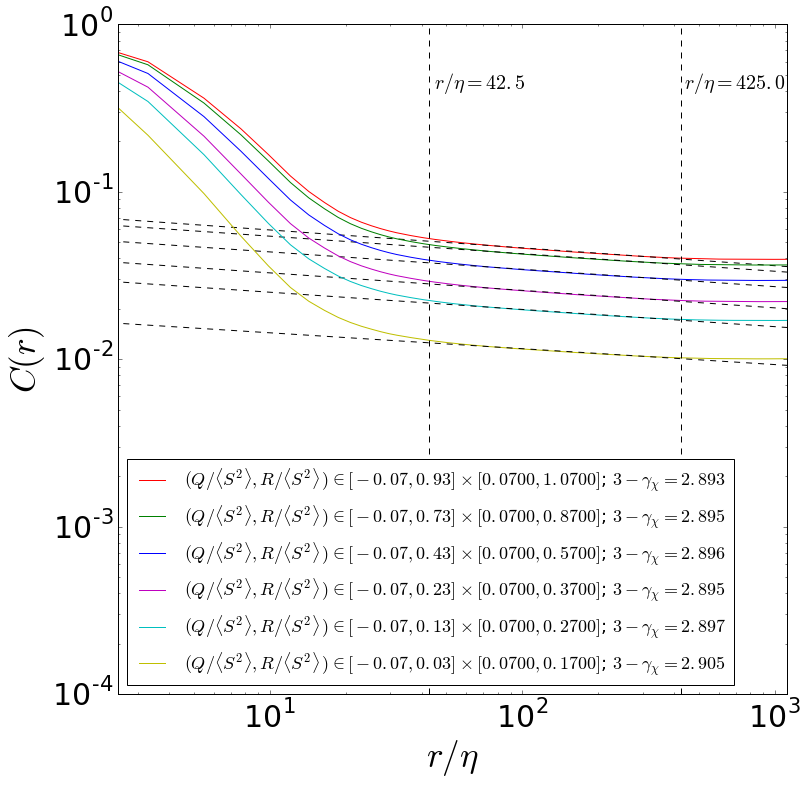

In [25]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-4),10**(0)])

ix = 81; jx = 81; 
for i in range(6):
    corrF = ecorr0[i]/elogr0[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-0.pdf', bbox_inches='tight')

In [26]:
start = time.time()

ecorr1 = []
elogr1 = []

tQ = -1
tR = 0.07
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr1.append(corrLoc); elogr1.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-1, 0.0, 0.07, 1.07)
(-1, -0.19999999999999996, 0.07, 0.8700000000000001)
(-1, -0.5, 0.07, 0.5700000000000001)
(-1, -0.7, 0.07, 0.37)
(-1, -0.8, 0.07, 0.27)
(-1, -0.9, 0.07, 0.17)
(-1, -0.95, 0.07, 0.12000000000000001)
time : 968.255808115


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.07434985 -1.38838163]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.07152134 -1.47550118]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.09545238 -1.73197608]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.12222921 -2.08829933]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.13621312 -2.68113065]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.19247058 -4.0354787 ]


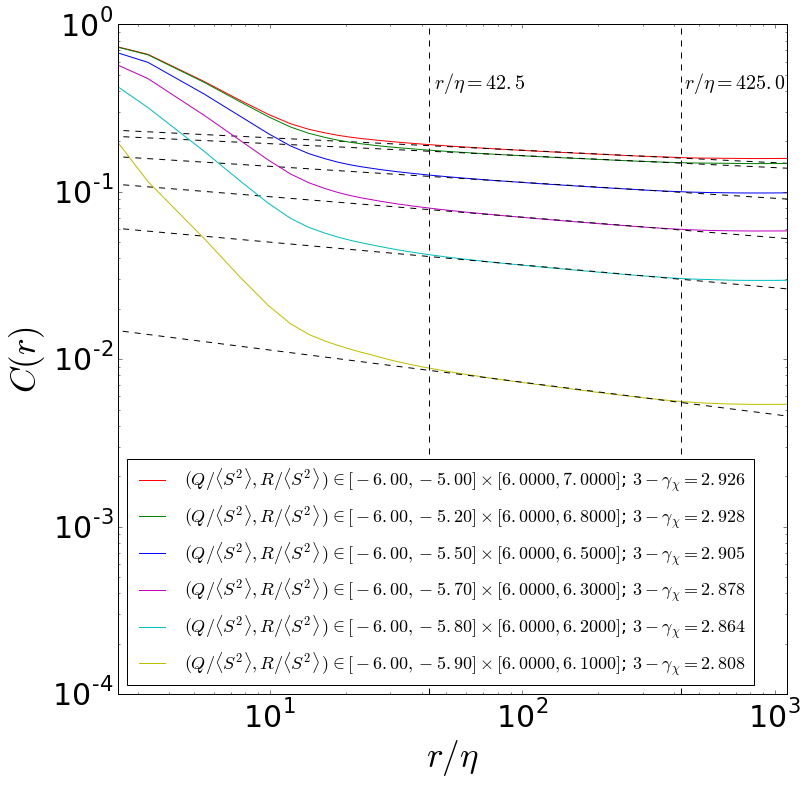

In [50]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-4),10**(0)])

ix = 81; jx = 58; 
for i in range(6):
    corrF = ecorr1[i]/elogr1[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-1.pdf', bbox_inches='tight')

In [28]:
start = time.time()

ecorr2 = []
elogr2 = []

tQ = -0.07
tR = -1
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr2.append(corrLoc); elogr2.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-0.07, 0.9299999999999999, -1, 0.0)
(-0.07, 0.73, -1, -0.19999999999999996)
(-0.07, 0.43, -1, -0.5)
(-0.07, 0.22999999999999998, -1, -0.7)
(-0.07, 0.13, -1, -0.8)
(-0.07, 0.03, -1, -0.9)
(-0.07, -0.020000000000000004, -1, -0.95)
time : 968.557223082


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.0192929  -0.76299285]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.15267912 -2.09202298]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.35172089 -2.80010045]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.43634088 -3.69143141]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.46749141 -4.48311177]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.4980926  -5.87717722]


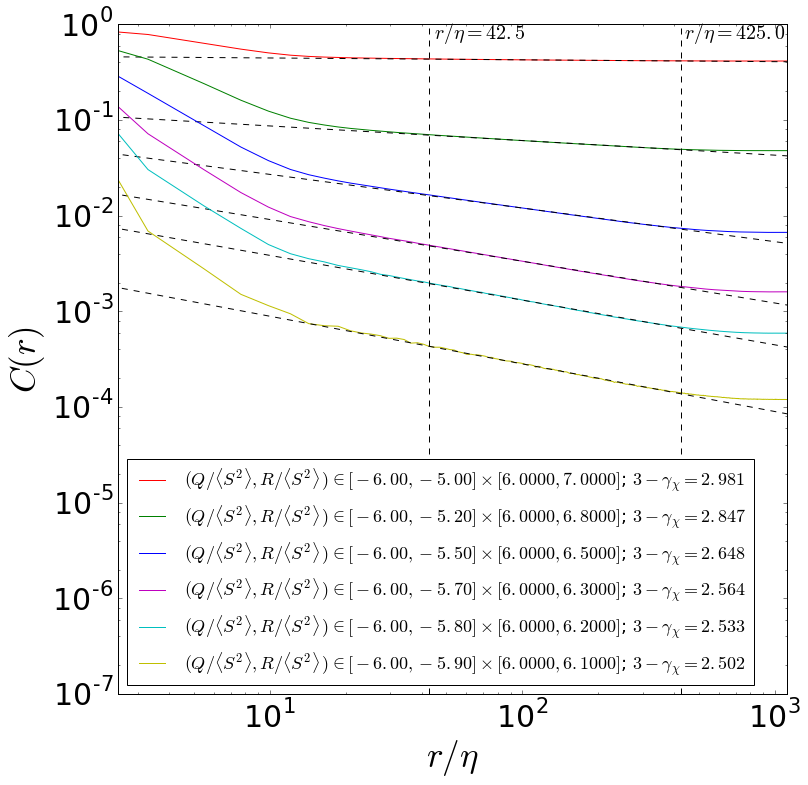

In [55]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-7),10**(0.0)])

ix = 58; jx = 81; 
for i in range(6):
    corrF = ecorr2[i]/elogr2[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.715, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.715, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-2.pdf', bbox_inches='tight')

In [30]:
start = time.time()

ecorr3 = []
elogr3 = []

tQ = 1
tR = 0.07
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr3.append(corrLoc); elogr3.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(1, 2.0, 0.07, 1.07)
(1, 1.8, 0.07, 0.8700000000000001)
(1, 1.5, 0.07, 0.5700000000000001)
(1, 1.3, 0.07, 0.37)
(1, 1.2, 0.07, 0.27)
(1, 1.1, 0.07, 0.17)
(1, 1.05, 0.07, 0.12000000000000001)
time : 956.785243034


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.14701004 -3.54782494]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.13818217 -3.68334402]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.12023316 -4.00863135]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.1025418  -4.43765004]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.09052611 -4.85595334]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.07638968 -5.75604833]


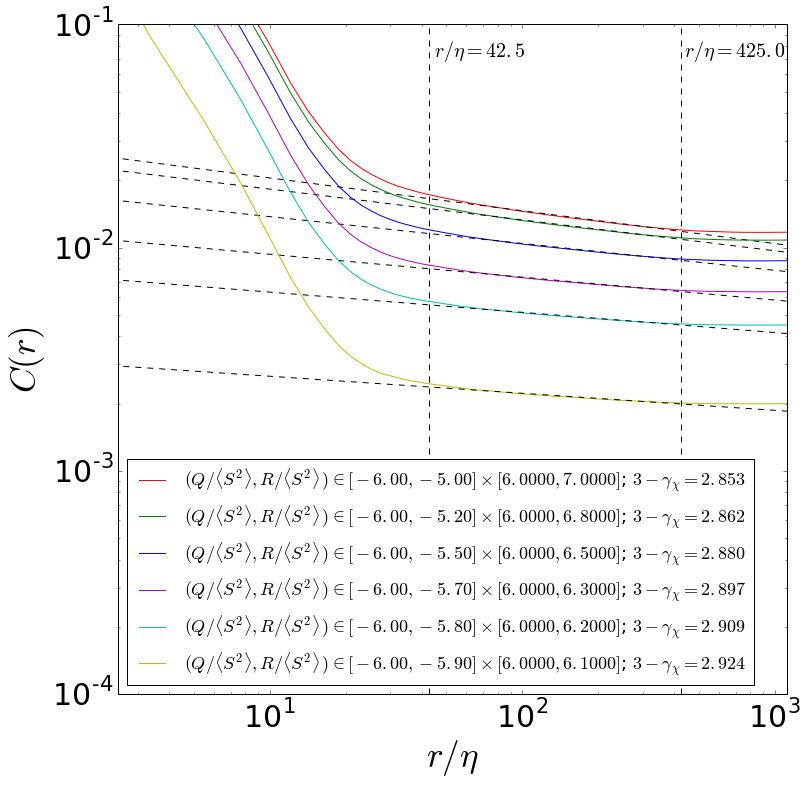

In [56]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-4),10**(-1)])

ix = 92; jx = 92; 
for i in range(6):
    corrF = ecorr3[i]/elogr3[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.0715, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.0715, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-3.pdf', bbox_inches='tight')

In [32]:
start = time.time()

ecorr4 = []
elogr4 = []

tQ = -0.07
tR = 1
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr4.append(corrLoc); elogr4.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-0.07, 0.9299999999999999, 1, 2.0)
(-0.07, 0.73, 1, 1.8)
(-0.07, 0.43, 1, 1.5)
(-0.07, 0.22999999999999998, 1, 1.3)
(-0.07, 0.13, 1, 1.2)
(-0.07, 0.03, 1, 1.1)
(-0.07, -0.020000000000000004, 1, 1.05)
time : 957.474309921


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.53770092 -3.37910501]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.53821217 -3.57630437]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.53239677 -4.11363604]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.52446378 -4.84918363]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.52723559 -5.46358118]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.52167262 -6.70732094]


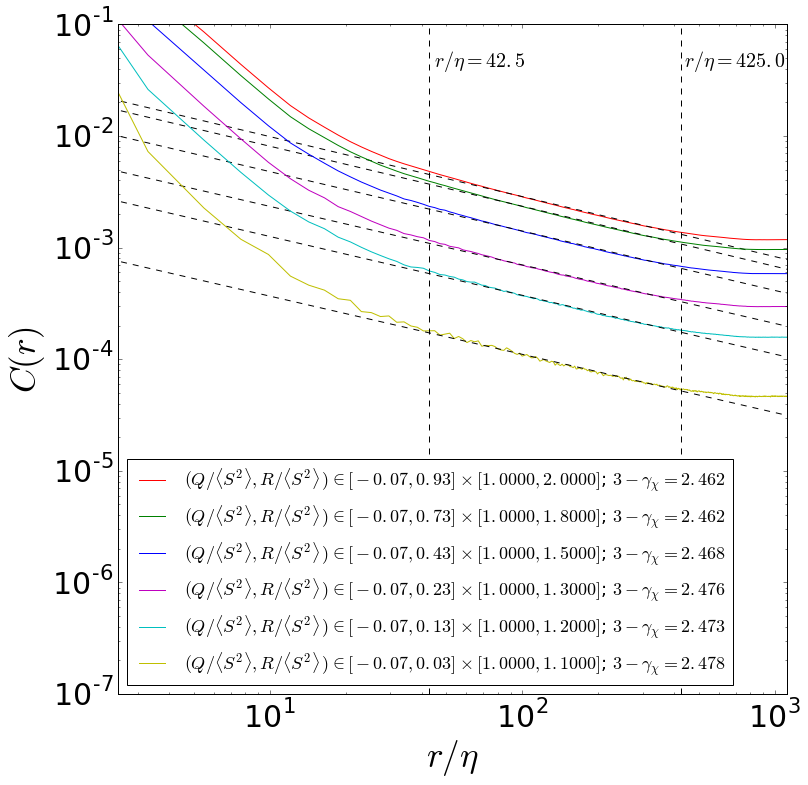

In [33]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-7),10**(-1)])

ix = 98; jx = 98; 
for i in range(6):
    corrF = ecorr4[i]/elogr4[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.0415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.0415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-4.pdf', bbox_inches='tight')

In [34]:
start = time.time()

ecorr5 = []
elogr5 = []

tQ = -1
tR = -1
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr5.append(corrLoc); elogr5.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-1, 0.0, -1, 0.0)
(-1, -0.19999999999999996, -1, -0.19999999999999996)
(-1, -0.5, -1, -0.5)
(-1, -0.7, -1, -0.7)
(-1, -0.8, -1, -0.8)
(-1, -0.9, -1, -0.9)
(-1, -0.95, -1, -0.95)
time : 967.124536037


t = -15.0*sigma_2: Linear fit [alpha A] = [ -9.20518107e-04  -1.19286190e+00]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.37349372 -1.94798807]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.5320353  -2.78518894]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.59346011 -3.75764291]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.62664472 -4.53649721]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.63751888 -6.0228833 ]


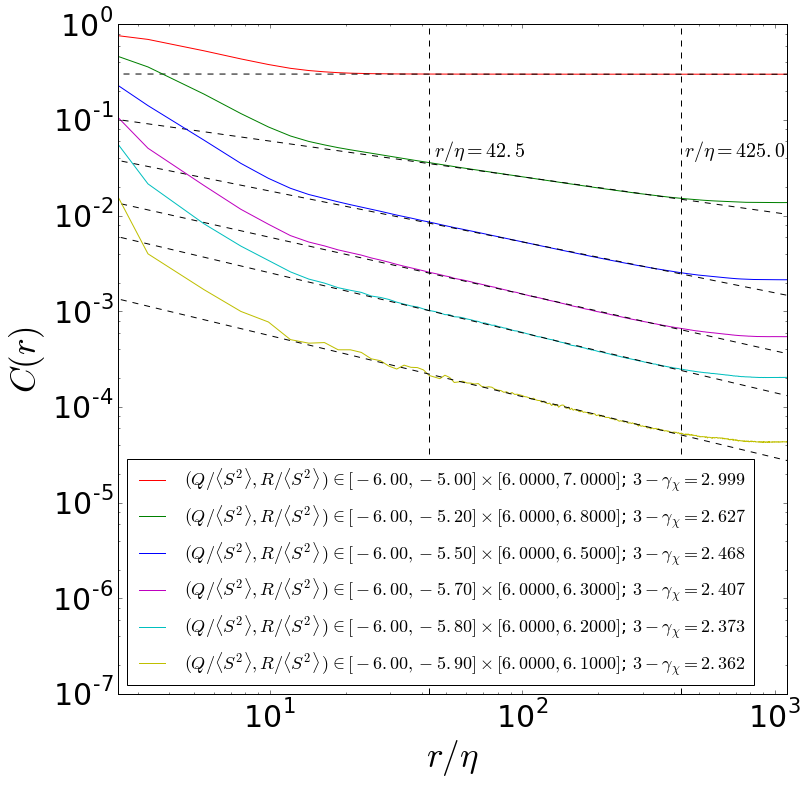

In [57]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-7),10**(0)])

ix = 56; jx = 56; 
for i in range(6):
    corrF = ecorr5[i]/elogr5[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.0415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.0415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-5.pdf', bbox_inches='tight')

In [36]:
start = time.time()

ecorr6 = []
elogr6 = []

tQ = -1
tR = 1
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr6.append(corrLoc); elogr6.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-1, 0.0, 1, 2.0)
(-1, -0.19999999999999996, 1, 1.8)
(-1, -0.5, 1, 1.5)
(-1, -0.7, 1, 1.3)
(-1, -0.8, 1, 1.2)
(-1, -0.9, 1, 1.1)
(-1, -0.95, 1, 1.05)
time : 943.373882055


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.59593498 -2.93731694]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.58882153 -3.16391531]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.5756458  -3.70413702]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.56053148 -4.42999456]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.54603665 -5.12867402]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.53546572 -6.38120289]


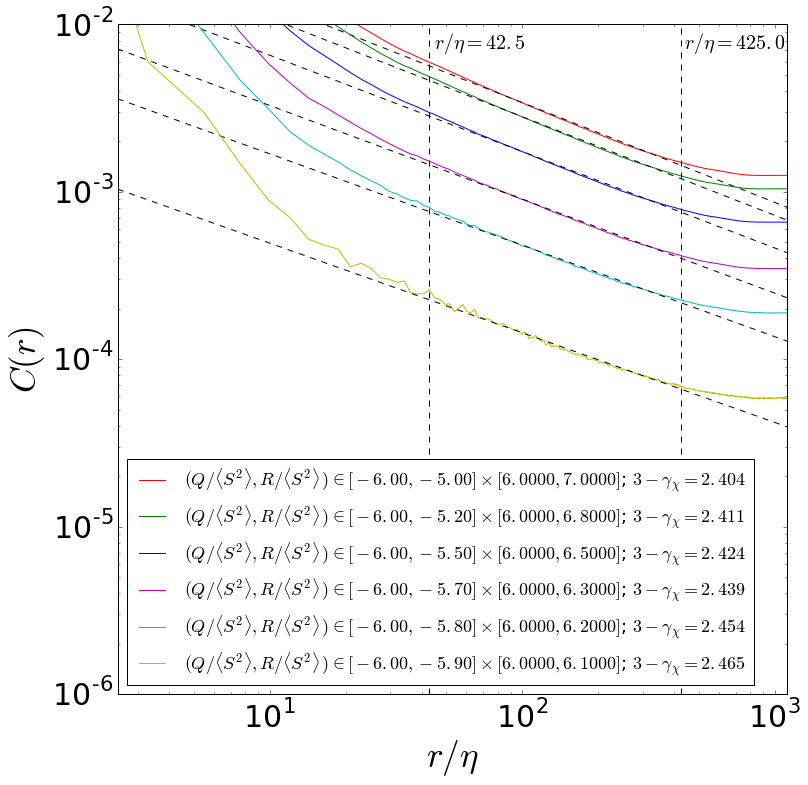

In [62]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-6),10**(-2)])

ix = 52; jx = 52; 
for i in range(6):
    corrF = ecorr6[i]/elogr6[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.00715, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.00715, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-6.pdf', bbox_inches='tight')

In [22]:
start = time.time()

ecorr7 = []
elogr7 = []

tQ = 1
tR = -1
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr7.append(corrLoc); elogr7.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(1, 2.0, -1, 0.0)
(1, 1.8, -1, -0.19999999999999996)
(1, 1.5, -1, -0.5)
(1, 1.3, -1, -0.7)
(1, 1.2, -1, -0.8)
(1, 1.1, -1, -0.9)
(1, 1.05, -1, -0.95)
time : 950.319306135


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.08461282 -2.67277712]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.10477461 -2.865004  ]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.18562456 -3.32412888]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.25076428 -4.05064952]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.27987239 -4.76468977]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.30653065 -6.10283936]


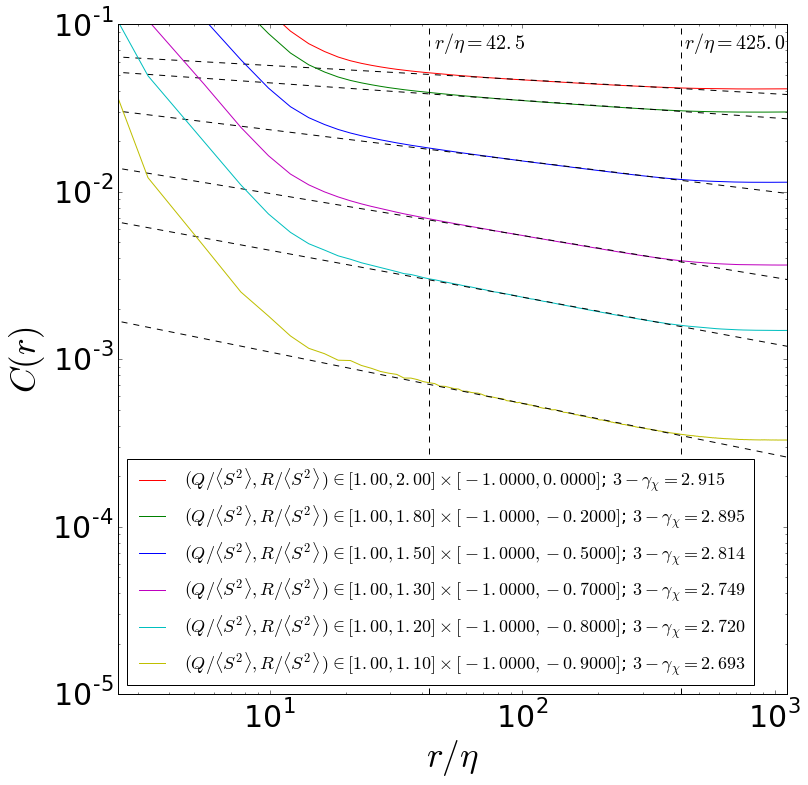

In [26]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-5),10**(-1)])

ix = 106; jx = 106; 
for i in range(6):
    corrF = ecorr7[i]/elogr7[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.0715, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.0715, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-7.pdf', bbox_inches='tight')

In [40]:
start = time.time()

ecorr8 = []
elogr8 = []

tQ = 1
tR = 1
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr8.append(corrLoc); elogr8.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(1, 2.0, 1, 2.0)
(1, 1.8, 1, 1.8)
(1, 1.5, 1, 1.5)
(1, 1.3, 1, 1.3)
(1, 1.2, 1, 1.2)
(1, 1.1, 1, 1.1)
(1, 1.05, 1, 1.05)
time : 958.231663942


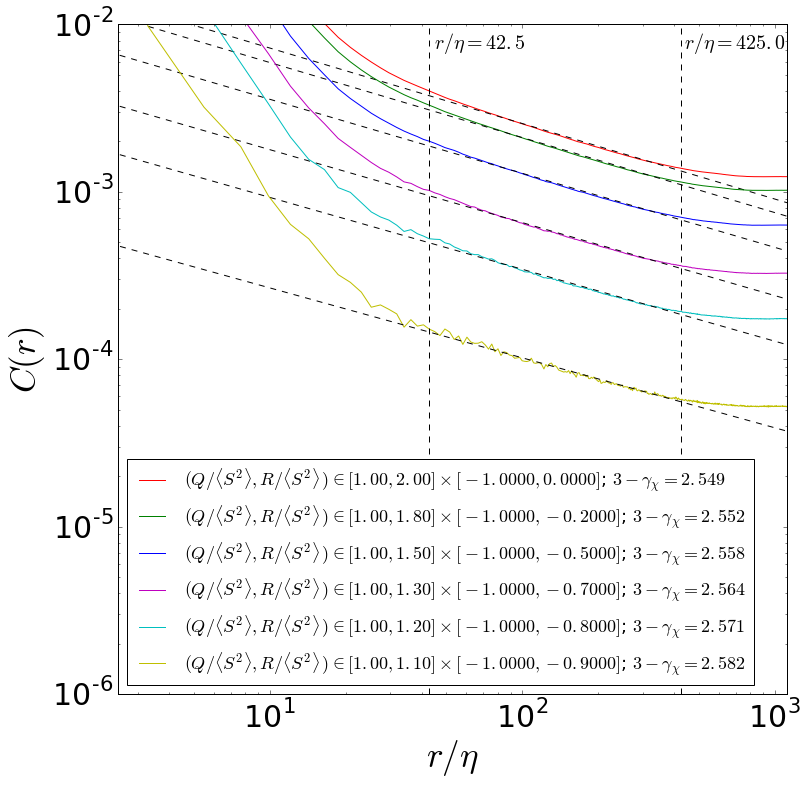

In [67]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-6),10**(-2)])

ix = 102; jx = 102; 
for i in range(6):
    corrF = ecorr8[i]/elogr8[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = [np.nan,np.nan]
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.00715, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.00715, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-8.pdf', bbox_inches='tight')

In [42]:
start = time.time()

ecorr9 = []
elogr9 = []

tQ = -2
tR = 2
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr9.append(corrLoc); elogr9.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-2, -1.0, 2, 3.0)
(-2, -1.2, 2, 2.8)
(-2, -1.5, 2, 2.5)
(-2, -1.7, 2, 2.3)
(-2, -1.8, 2, 2.2)
(-2, -1.9, 2, 2.1)
(-2, -1.95, 2, 2.05)
time : 951.838529825


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.78911587 -3.06214057]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.77906465 -3.36211246]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.76079255 -4.07366417]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.74599816 -4.93511213]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.74528358 -5.63217975]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.73904492 -6.88644352]


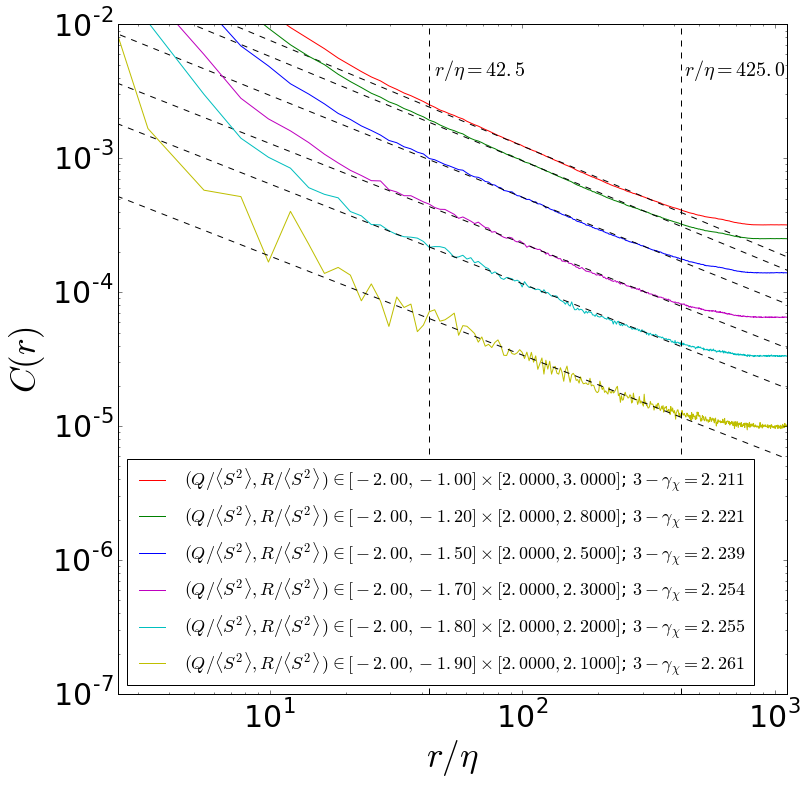

In [43]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-7),10**(-2)])

ix = 81; jx = 58; 
for i in range(6):
    corrF = ecorr9[i]/elogr9[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.00415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.00415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-9.pdf', bbox_inches='tight')

In [44]:
start = time.time()

ecorr10 = []
elogr10 = []

tQ = -3
tR = 3
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr10.append(corrLoc); elogr10.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-3, -2.0, 3, 4.0)
(-3, -2.2, 3, 3.8)
(-3, -2.5, 3, 3.5)
(-3, -2.7, 3, 3.3)
(-3, -2.8, 3, 3.2)
(-3, -2.9, 3, 3.1)
(-3, -2.95, 3, 3.05)
time : 961.429598093


t = -15.0*sigma_2: Linear fit [alpha A] = [-0.91035118 -3.14858108]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-0.89602908 -3.49618764]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-0.88358145 -4.23491399]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-0.87395077 -5.10979983]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.89694926 -5.68450797]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [-0.87180217 -6.9759842 ]


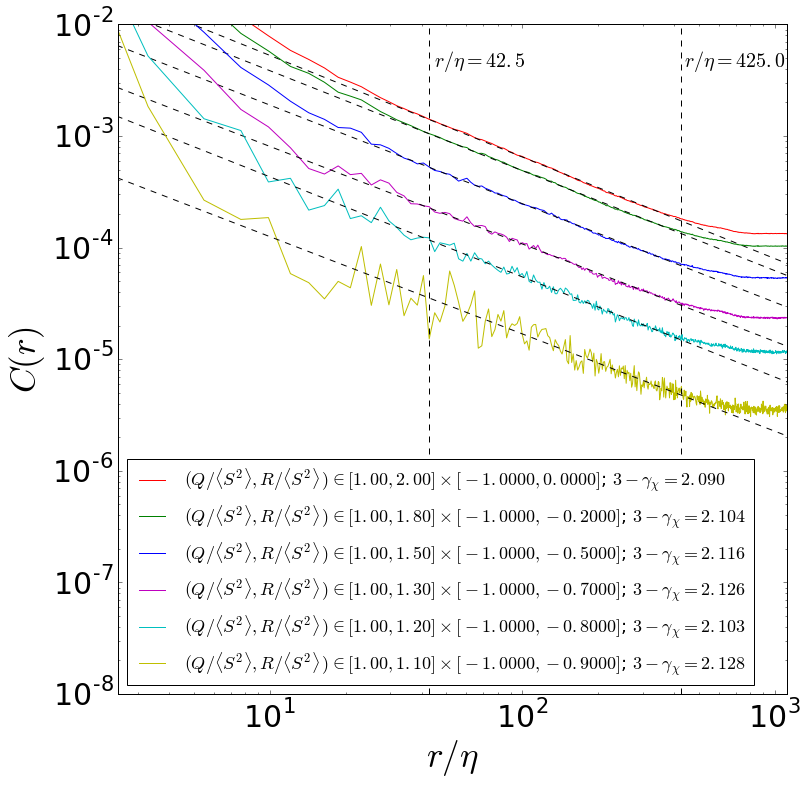

In [69]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-8),10**(-2)])

ix = 40; jx = 81; 
for i in range(6):
    corrF = ecorr10[i]/elogr10[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.00415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.00415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-10.pdf', bbox_inches='tight')

In [46]:
start = time.time()

ecorr11 = []
elogr11 = []

tQ = -6
tR = 6
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr11.append(corrLoc); elogr11.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-6, -5.0, 6, 7.0)
(-6, -5.2, 6, 6.8)
(-6, -5.5, 6, 6.5)
(-6, -5.7, 6, 6.3)
(-6, -5.8, 6, 6.2)
(-6, -5.9, 6, 6.1)
(-6, -5.95, 6, 6.05)
time : 943.350712061


t = -15.0*sigma_2: Linear fit [alpha A] = [-1.09034962 -3.19354216]
t = -14.8744769874*sigma_2: Linear fit [alpha A] = [-1.0884331  -3.47395464]
t = -14.7489539749*sigma_2: Linear fit [alpha A] = [-1.0591475  -4.25987663]
t = -14.6234309623*sigma_2: Linear fit [alpha A] = [-1.04482385 -5.10639517]
t = -14.4979079498*sigma_2: Linear fit [alpha A] = [-0.97757244 -6.08535822]
t = -14.3723849372*sigma_2: Linear fit [alpha A] = [ nan  nan]


/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log


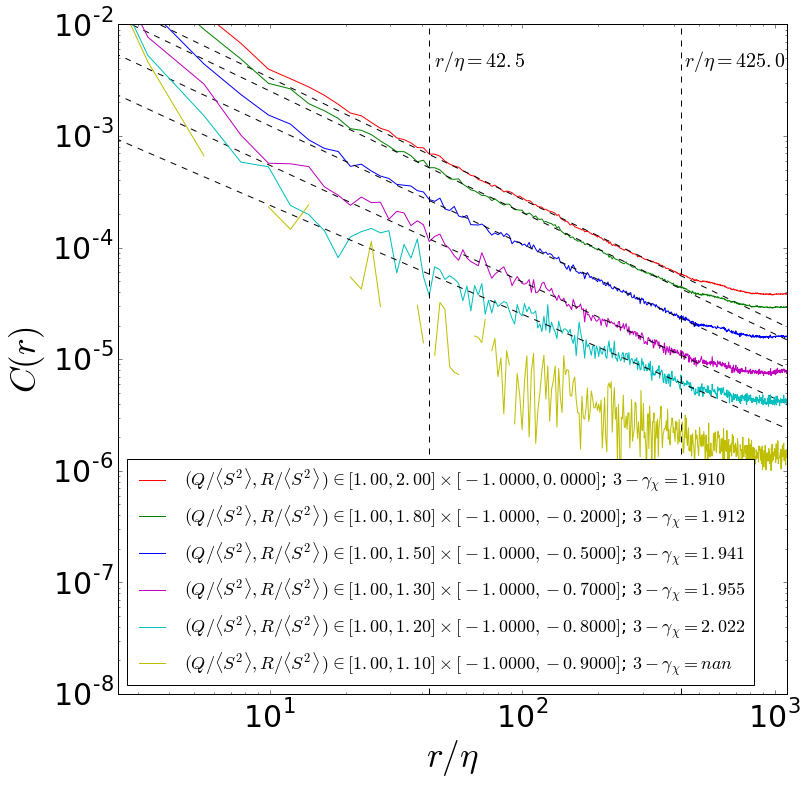

In [71]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-8),10**(-2)])

i = 28; j = 74; 
for i in range(6):
    corrF = ecorr11[i]/elogr11[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.00415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.00415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-11.pdf', bbox_inches='tight')

In [27]:
start = time.time()

ecorr12 = []
elogr12 = []

tQ = -10
tR = 10
dtl = [1.0,0.8,0.5,0.3,0.2,0.1,0.05]

for dt in dtl:
    tQm = tQ; tQM = tQ+dt; tRm = tR; tRM = tR+dt
    print(tQm,tQM,tRm,tRM)
    Idx = (Q>tQm)&(Q<tQM)&(R>tRm)&(R<tRM)
    
    chi[:,:,:] = 0
    chi[Idx] = 1
    corrLoc,r2Loc = radialCorr(N,chi,fo,bo,fft_object,ifft_object,r2rt,minrt,maxrt,rbins)
    ecorr12.append(corrLoc); elogr12.append(r2Loc)
    
end = time.time()
print("time : "+str(end-start))

(-10, -9.0, 10, 11.0)
(-10, -9.2, 10, 10.8)
(-10, -9.5, 10, 10.5)
(-10, -9.7, 10, 10.3)
(-10, -9.8, 10, 10.2)
(-10, -9.9, 10, 10.1)
(-10, -9.95, 10, 10.05)
time : 981.40395093


In [ ]:
%matplotlib inline

eta = 0.00280

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-8),10**(-2)])

i = 28; j = 74; 
for i in range(6):
    corrF = ecorr12[i]/elogr12[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("t = "+str(tl[i])+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    dt = dtl[i]
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'$(Q/\langle S^2\rangle,R/\langle S^2\rangle^{{}}) \in [{one:.2f},{two:.2f}] \times [{tree:.4f},{four:.4f}] $; $3-\gamma_\chi = {five:.3f}$'.format(one=tQ,two=tQ+dt,tree=tR,four=tR+dt,five=3+fit[0]))
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.00415, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.00415, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':18})
plt.savefig('QR-thickness-sensitivity-12.pdf', bbox_inches='tight')